<h1>Clustering con K-means en el Dataset Iris</h1>

<h2>Preparación del Dataset</h2>

Importación de librerias

In [233]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode



Carga del Dataset Iris

In [234]:
# Cargar el Dataset de Iris
iris = load_iris()

X = iris.data
y = iris.target 

Visualización con PCA en 2D y 3D

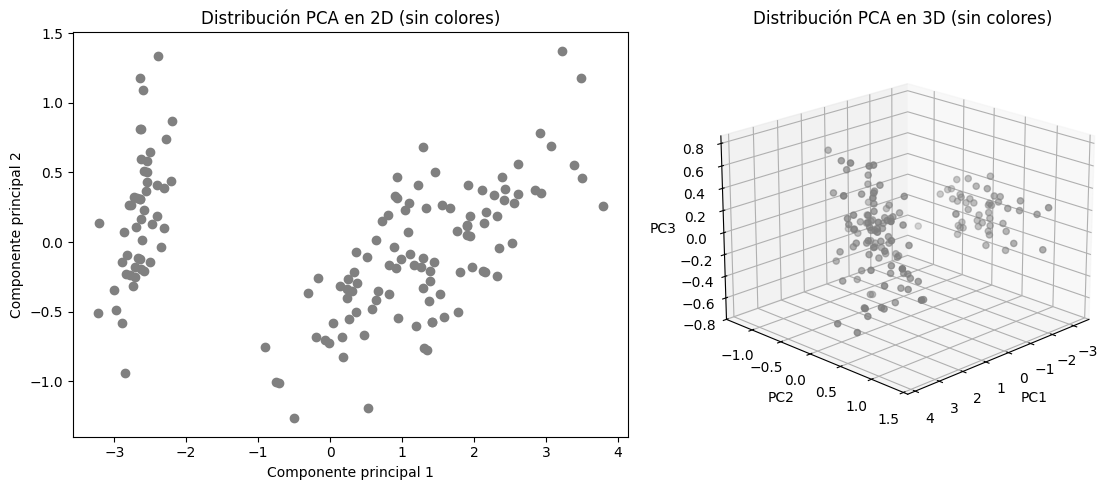

In [235]:
# Aplicar PCA a 2 y 3 dimensiones
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

iris_pca_2d = pca_2d.fit_transform(iris.data)
iris_pca_3d = pca_3d.fit_transform(iris.data)

# 4. Crear gráficos uno al lado del otro
fig = plt.figure(figsize=(12, 5))

# --- Gráfico 2D ---
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(iris_pca_2d[:, 0], iris_pca_2d[:, 1], color='gray')
ax1.set_title("Distribución PCA en 2D (sin colores)")
ax1.set_xlabel("Componente principal 1")
ax1.set_ylabel("Componente principal 2")

# --- Gráfico 3D ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(iris_pca_3d[:, 0], iris_pca_3d[:, 1], iris_pca_3d[:, 2], color='gray')
ax2.set_title("Distribución PCA en 3D (sin colores)")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")

ax2.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()


<h2>Implementación de K-means en Python</h2>

<h3>Implementación desde cero</h3>

#### Función `euclidean_distance`


In [236]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

#### Función `initialize centroids`


In [237]:
def initialize_centroids(data, k):
    np.random.seed(42)  # Para reproducibilidad
    random_indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[random_indices]
    return centroids

#### Función `assign_clusters`


In [238]:
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

#### Función `calculate centroids`

In [239]:
def calculate_centroids(data, clusters, k):
    centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            centroids.append(np.mean(cluster_points, axis=0))
        else:
            centroids.append(data[np.random.randint(0, data.shape[0])])
    return  np.array(centroids)  

#### Función `kmeans`

In [240]:
def kmeans(data, k, max_iters=100):
    centroids = initialize_centroids(data,k)
    for _ in range(max_iters):
        clusters = assign_clusters(data, centroids)
        new_centroids = calculate_centroids(data, clusters, k)

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

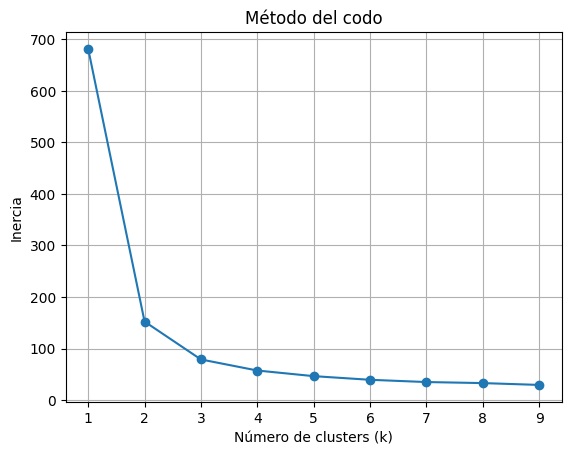

In [241]:
def calcular_inercia(X, centroids, clusters):
    inercia = 0
    for i in range(len(X)):
        centroide = centroids[clusters[i]]
        dist = sum((X[i][j] - centroide[j])**2 for j in range(len(X[i])))
        inercia += dist
    return inercia

inertias = []
K = range(1, 10)
for k in K:
    centroids, clusters = kmeans(X, k)
    inertias.append(calcular_inercia(X, centroids, clusters))

plt.plot(K, inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.grid(True)
plt.show()


<h2>Visualización de Clusters</h2>

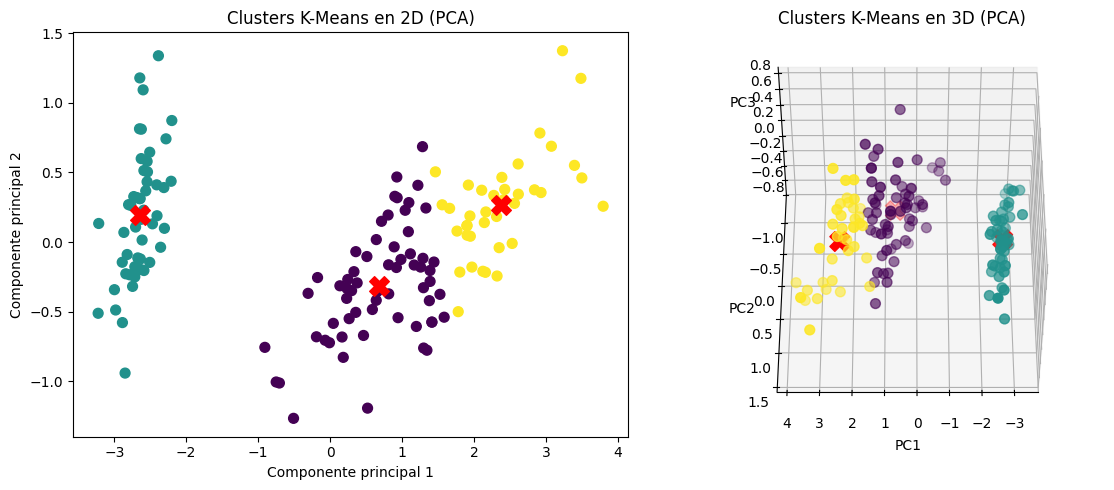

In [242]:
centroids, clusters = kmeans(iris.data, k=3, max_iters=100)

pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)
X_pca_2d = pca_2d.fit_transform(iris.data)
X_pca_3d = pca_3d.fit_transform(iris.data)
centroids_2d = pca_2d.transform(centroids)
centroids_3d = pca_3d.transform(centroids)

fig = plt.figure(figsize=(12, 5))

# --- Gráfico 2D ---
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=clusters, cmap='viridis', s=50)
ax1.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', s=200, marker='X')
ax1.set_title("Clusters K-Means en 2D (PCA)")
ax1.set_xlabel("Componente principal 1")
ax1.set_ylabel("Componente principal 2")

# --- Gráfico 3D ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=clusters, cmap='viridis', s=50)
ax2.scatter(centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2], c='red', s=200, marker='X')
ax2.set_title("Clusters K-Means en 3D (PCA)")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")
ax2.view_init(elev=50, azim=90)

plt.tight_layout()
plt.show()


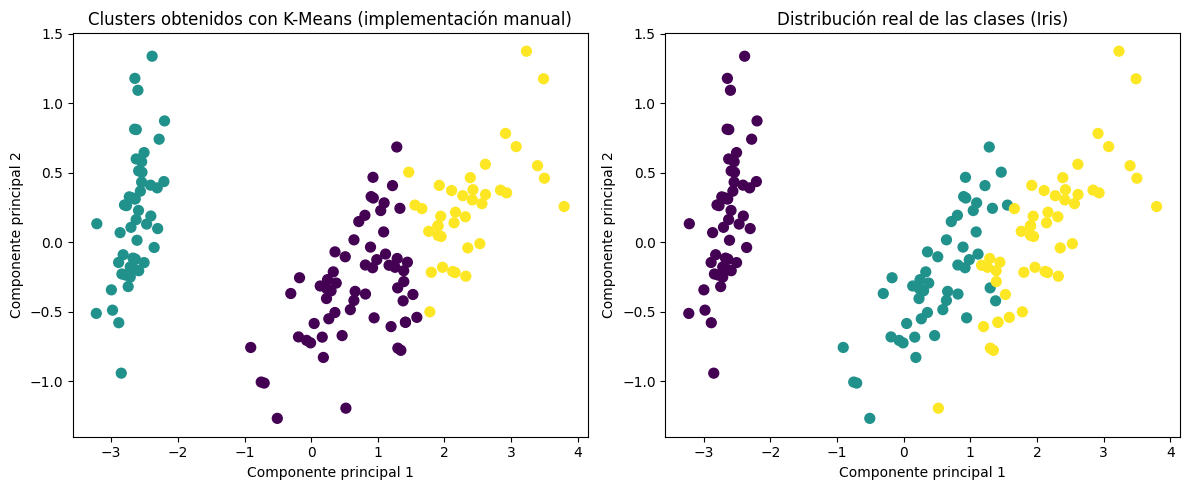

In [243]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)
centroids_pca = pca.transform(centroids)
# Crear figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Gráfico 1: Clusters obtenidos con K-Means manual ---
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
axes[0].set_title("Clusters obtenidos con K-Means (implementación manual)")
axes[0].set_xlabel("Componente principal 1")
axes[0].set_ylabel("Componente principal 2")

# --- Gráfico 2: Clases reales del dataset Iris ---
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
axes[1].set_title("Distribución real de las clases (Iris)")
axes[1].set_xlabel("Componente principal 1")
axes[1].set_ylabel("Componente principal 2")

plt.tight_layout()
plt.show()

<H3>Calcular Inercia</H3>

In [244]:
inercia_manual = calcular_inercia(X, centroids, clusters)
print("Inercia K-means manual:", inercia_manual)

Inercia K-means manual: 78.851441426146


<H3>Calcular Precision</H3>

In [245]:
def precision_kmeans(y, clusters, k):
    aciertos = 0
    for cluster_id in range(k):
        # Encuentra los índices de los puntos asignados a este cluster
        indices = [i for i, c in enumerate(clusters) if c == cluster_id]
        if not indices:
            continue
        # Encuentra la etiqueta más frecuente en este cluster
        etiquetas = [y[i] for i in indices]
        etiqueta_mas_comun = max(set(etiquetas), key=etiquetas.count)
        # Suma los aciertos
        aciertos += sum(1 for i in indices if y[i] == etiqueta_mas_comun)
    return aciertos / len(y)
precision = precision_kmeans(y, clusters, k=3)
print("Precisión K-means sobre Iris:", precision)


Precisión K-means sobre Iris: 0.8933333333333333


<h3>Implementación con librerias</h3>

In [246]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris.data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

<h2>Visualización de Clusters</h2>

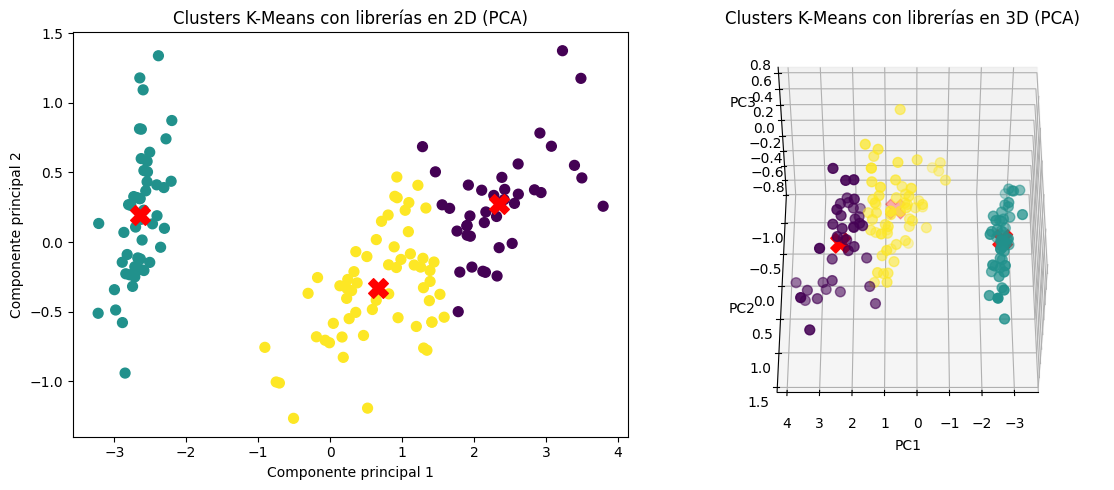

In [247]:

pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)
X_pca_2d = pca_2d.fit_transform(iris.data)
X_pca_3d = pca_3d.fit_transform(iris.data)

centroids_2d = pca_2d.transform(centroids)
centroids_3d = pca_3d.transform(centroids)

fig = plt.figure(figsize=(12, 5))
# --- Gráfico 2D ---
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='viridis', s=50)
ax1.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', s=200, marker='X')
ax1.set_title("Clusters K-Means con librerías en 2D (PCA)")
ax1.set_xlabel("Componente principal 1")
ax1.set_ylabel("Componente principal 2")
# --- Gráfico 3D ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=labels, cmap='viridis', s=50)
ax2.scatter(centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2], c='red', s=200, marker='X')
ax2.set_title("Clusters K-Means con librerías en 3D (PCA)")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")
ax2.view_init(elev=50, azim=90)
plt.tight_layout()
plt.show()

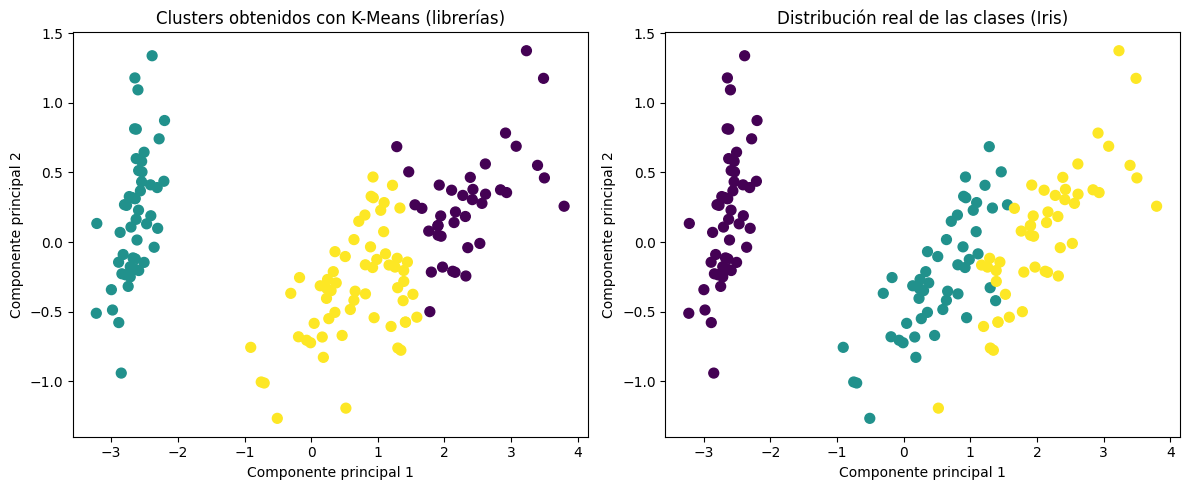

In [248]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)
centroids_pca = pca.transform(centroids)
# Crear figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# --- Gráfico 1: Clusters obtenidos con K-Means de librerías ---
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
axes[0].set_title("Clusters obtenidos con K-Means (librerías)")
axes[0].set_xlabel("Componente principal 1")
axes[0].set_ylabel("Componente principal 2")
# --- Gráfico 2: Clases reales del dataset Iris ---
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
axes[1].set_title("Distribución real de las clases (Iris)")
axes[1].set_xlabel("Componente principal 1")
axes[1].set_ylabel("Componente principal 2")
plt.tight_layout()
plt.show()

In [249]:
inercia = kmeans.inertia_
print("Inercia K-Means (sklearn):", inercia)


Inercia K-Means (sklearn): 78.85566582597728


In [ ]:
labels = np.zeros_like(clusters)
for i in range(k):
    mask = (clusters == i)
    if np.any(mask):
        labels[mask] = mode(y[mask], keepdims=False).mode
    else:
        labels[mask] = -1

# --- Calcular precisión ---
precision = accuracy_score(y, labels)
print("Precisión K-Means (scikit-learn):", precision)

Precisión K-Means (scikit-learn): 0.8933333333333333
